# TDS Week 4B Assignment

# Imports

In [32]:
# ---------- Common ------------
import os
import time
import json
import random
import ast
from datetime import datetime

# ---------- Data Manipulation ------------
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

from sklearn.cluster import KMeans

## Get the Data

In [2]:
root_path = r"C:\Users\tusha\Jupyter_notebooks\IITM_Term_5\TDS"
os.listdir(root_path)

['.ipynb_checkpoints',
 'Goat_2022.csv',
 'master_currency.csv',
 'rainfall-dataset.csv',
 'TDS Week 2 Assignment.ipynb',
 'TDS Week 3 Assignment.ipynb',
 'TDS Week 4 Assignment.ipynb',
 'TDS Week 5 Assignment.ipynb',
 'TDS_Week_1_Assignment.ipynb',
 'TDS_Week_5_Dataset_1_q789.csv',
 'TDS_Week_5_Dataset_2_q10.csv']

### Load Data: for Q. 7,8,9

In [3]:
data_path = os.path.join(root_path, 'TDS_Week_5_Dataset_1_q789.csv')
df = pd.read_csv(data_path)
print(f"Data Shape: {df.shape}")

Data Shape: (10000, 9)


In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure


In [5]:
df.isnull().sum(axis=0)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


## Questions

### Q.7] Assume we are trying to create a binary classification problem with the column "Failure Type" as our target variable.If "Heat Dissipation Failure" in that column is true class which we replace with 1 and rest all values with 0, the ratio of 1:0 is?

In [8]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [12]:
# Heat Dissipation Failure     112
# Rest all                    9888
# answer --> 112 : 9888

### Q.8] Assume we are trying to create a binary classification problem with the column "Failure Type" as our target variable.If "Random Failures" in that column is true class which we replace with 1 and rest all values with 0, the ratio of 1:0 is?

In [13]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [15]:
# Random Failures               18
# Rest all                    9982
# answer --> 18 : 9982

### Q.9] You have decided to remove outliers using IQR.On the base dataset, if you had applied IQR on the variable "Rotational speed [rpm]" and removed outliers, the resulting dataset has how many rows?

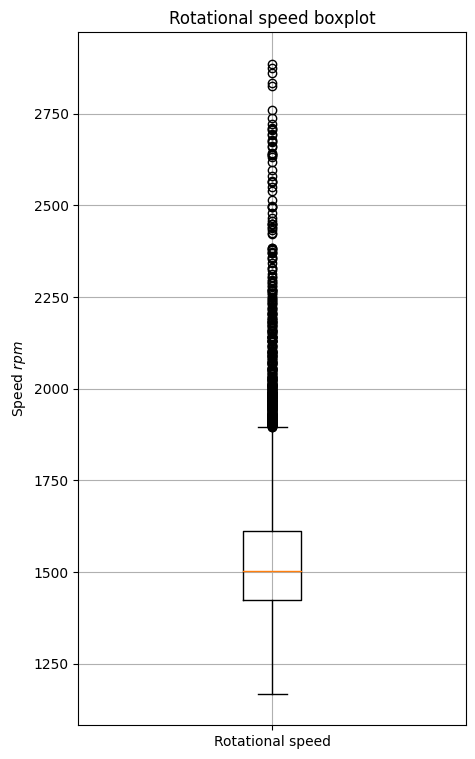

In [25]:
plt.figure(figsize=(5,9))
plt.boxplot(df["Rotational speed [rpm]"])
plt.ylabel("Speed $rpm$")
plt.xticks([1], ["Rotational speed"])
plt.title("Rotational speed boxplot")
plt.grid()
plt.show()

In [26]:
Q1 = df["Rotational speed [rpm]"].quantile(0.25)
Q3 = df["Rotational speed [rpm]"].quantile(0.75)
IQR = Q3 - Q1
((df["Rotational speed [rpm]"] < (Q1 - 1.5 * IQR)) | (df["Rotational speed [rpm]"] > (Q3 + 1.5 * IQR))).sum()

418

In [27]:
df.shape[0] - 418

9582

### Load Data: for Q.10

In [28]:
data_path = os.path.join(root_path, 'TDS_Week_5_Dataset_2_q10.csv')
df = pd.read_csv(data_path)
print(f"Data Shape: {df.shape}")

Data Shape: (1225, 11)


In [29]:
df.head()

,record number,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %
0,0,0.001319,0.001970,0.826221,0.021519,0.000000,0.476845,0.038117,0.000701,0.0,0.268651
1,1,0.000769,0.000579,0.441647,0.003081,0.000000,0.232072,0.000000,0.025832,0.0,0.190937
2,2,0.000132,0.000316,0.655003,0.000778,0.065568,0.000000,0.000000,0.001083,0.0,0.122265
3,3,0.000824,0.007208,0.000533,0.000252,0.408417,0.416031,0.000000,0.000918,0.0,0.100503
4,4,0.000596,0.000358,0.805526,0.003378,0.116626,0.474160,0.067420,0.029651,0.0,0.050376


In [30]:
df.isnull().sum(axis=0)

record number              0
Price                      0
Market Cap                 0
Free Float Market Cap %    0
6m ADV                     0
RoE %                      0
RoCE %                     0
EBIT Margin %              0
EPS                        0
PAT %                      0
Stock Return %             0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record number            1225 non-null   int64  
 1   Price                    1225 non-null   float64
 2   Market Cap               1225 non-null   float64
 3   Free Float Market Cap %  1225 non-null   float64
 4   6m ADV                   1225 non-null   float64
 5   RoE %                    1225 non-null   float64
 6   RoCE %                   1225 non-null   float64
 7   EBIT Margin %            1225 non-null   float64
 8   EPS                      1225 non-null   float64
 9   PAT %                    1225 non-null   float64
 10  Stock Return %           1225 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 105.4 KB


### Q.10] The dataset stockdatascaled.csv contains details of stocks of different companies. For your convenience, the dataset is already standardized. Please do a 7 cluster kmeans exercise on this dataset. Of the following pairs of records (see the ‘record’ column in the dataset) from this dataset, which pair belongs to the same cluster? (Note: the first column ‘record’ is not to be used in the clustering exercise. Also, please do set the seed to 1729 before running the k-means clustering).?

In [54]:
features = ['Price', 'Market Cap', 'Free Float Market Cap %', '6m ADV', 'RoE %', 'RoCE %', 'EBIT Margin %', 'EPS', 'PAT %', 'Stock Return %']
kmeans = KMeans(n_clusters=7, random_state=1729)
identified_clusters = kmeans.fit_predict(df[features])

In [55]:
identified_clusters

array([6, 6, 6, ..., 3, 3, 1])

In [56]:
df["cluster"] = identified_clusters

In [57]:
df.head()

,record number,Price,Market Cap,Free Float Market Cap %,6m ADV,RoE %,RoCE %,EBIT Margin %,EPS,PAT %,Stock Return %,cluster
0,0,0.001319,0.001970,0.826221,0.021519,0.000000,0.476845,0.038117,0.000701,0.0,0.268651,6
1,1,0.000769,0.000579,0.441647,0.003081,0.000000,0.232072,0.000000,0.025832,0.0,0.190937,6
2,2,0.000132,0.000316,0.655003,0.000778,0.065568,0.000000,0.000000,0.001083,0.0,0.122265,6
3,3,0.000824,0.007208,0.000533,0.000252,0.408417,0.416031,0.000000,0.000918,0.0,0.100503,6
4,4,0.000596,0.000358,0.805526,0.003378,0.116626,0.474160,0.067420,0.029651,0.0,0.050376,6


In [58]:
df.loc[df["record number"]==148, ["record number", "cluster"]].head(1)

,record number,cluster
148,148,3


In [59]:
options = [[148,499], [131,1028], [208,752], [832,742]]
for pair in options:
    a = df.loc[df["record number"]==pair[0]].head(1)["cluster"].values[0]
    b = df.loc[df["record number"]==pair[1]].head(1)["cluster"].values[0]
    print(f"Clusters: {pair[0]}-{a} \t\t {pair[1]}-{b}")

Clusters: 148-3 		 499-1
Clusters: 131-1 		 1028-1
Clusters: 208-3 		 752-0
Clusters: 832-0 		 742-1


# END